# Webscraping Wikipedia
Getting information from internet directly to python

[https://en.wikipedia.org/wiki/World_population](https://en.wikipedia.org/wiki/World_population)

In [31]:
from warnings import filterwarnings
filterwarnings("ignore")

### Install necessary packages

In [32]:
%pip install requests bs4 lxml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart kernel and run all cells

In [33]:
url = "https://en.wikipedia.org/wiki/World_population"
print(url)

https://en.wikipedia.org/wiki/World_population


# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6

<h1> Heading 1 </h1>
<h2> Heading 2 </h2>
<h3> Heading 3 </h3>

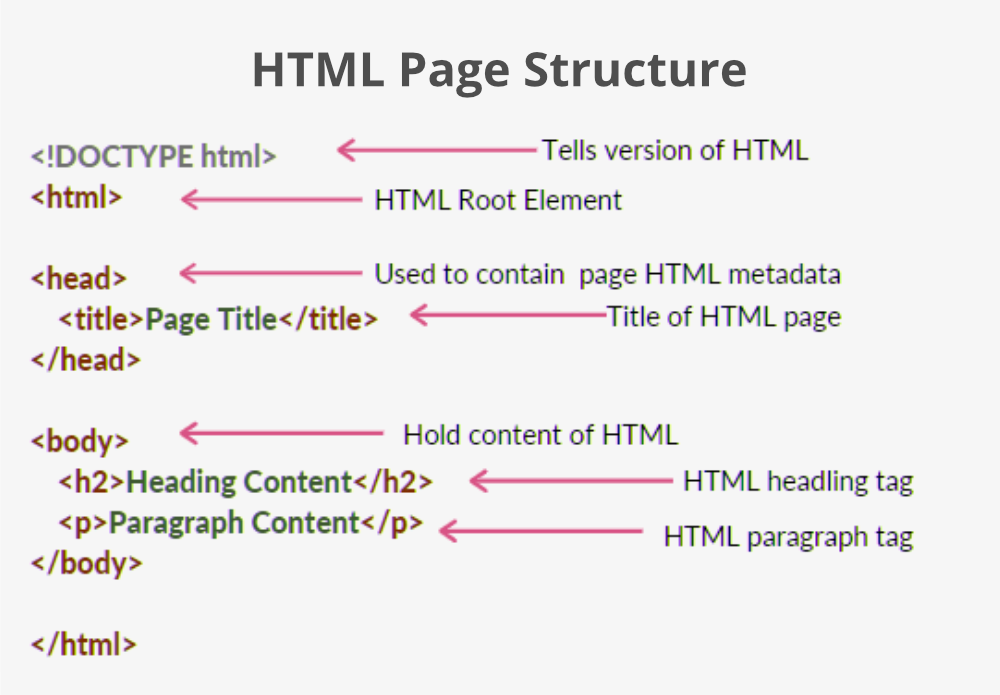

In [34]:
import requests
response = requests.get(url)
response

<Response [200]>

### Response 200 means ok and you fetched the content

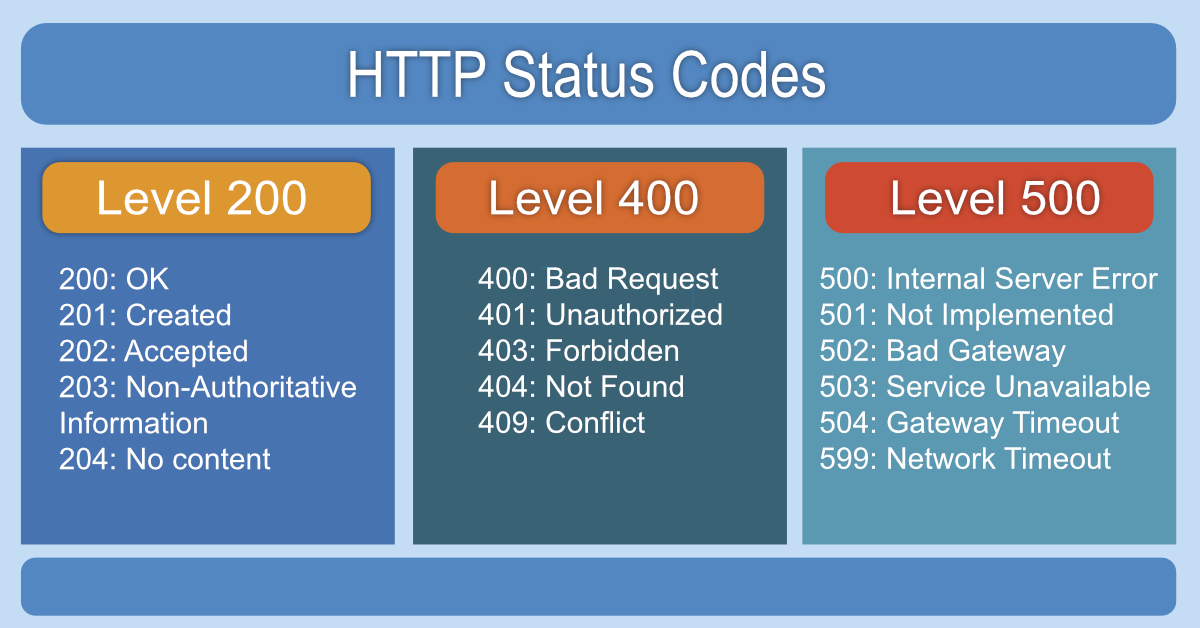

In [35]:
response.content[0:100]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'

### Create a beutiful soup

In [36]:
from bs4 import BeautifulSoup
s = BeautifulSoup(response.content)

In [37]:
title_tag = s.find("title")
title_tag

<title>World population - Wikipedia</title>

In [38]:
title_tag.text

'World population - Wikipedia'

In [39]:
h1_tags = s.find_all("h1")
h1_tags

[<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>]

In [40]:
h1_tags[0].text

'World population'

In [41]:
h2_tags = s.find_all("h2")
h2_tags

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h2 id="History">History</h2>,
 <h2 id="Global_demographics">Global demographics</h2>,
 <h2 id="Population_by_region">Population by region</h2>,
 <h2 id="Largest_populations_by_country">Largest populations by country</h2>,
 <h2 id="Fluctuation">Fluctuation</h2>,
 <h2 id="Mathematical_approximations">Mathematical approximations</h2>,
 <h2 id="Number_of_humans_who_have_ever_lived">Number of humans who have ever lived</h2>,
 <h2 id="Human_population_as_a_function_of_food_availability">Human population as a function of food availability</h2>,
 <h2 id="See_also">See also</h2>,
 <h2 id="Explanatory_notes">Explanatory notes</h2>,
 <h2 id="References">References</h2>,
 <h2 id="Further_reading">Further reading</h2>,
 <h2 id="External_links">External links</h2>]

In [42]:
h2_text = [tag.text for tag in h2_tags]
h2_text

['Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links']

In [43]:
h3_tags = s.find_all("h3")
h3_tags

[<h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3>,
 <h3 id="Modern_history">Modern history</h3>,
 <h3 id="Milestones_by_the_billions">Milestones by the billions</h3>,
 <h3 id="Ten_most_populous_countries">Ten most populous countries</h3>,
 <h3 id="Most_densely_populated_countries">Most densely populated countries</h3>,
 <h3 id="Annual_population_growth">Annual population growth</h3>,
 <h3 id="Population_growth_by_region">Population growth by region</h3>,
 <h3 id="Past_population">Past population</h3>,
 <h3 id="Projections">Projections</h3>,
 <h3 id="Years_for_world_population_to_double">Years for world population to double</h3>,
 <h3 id="Citations">Citations</h3>,
 <h3 id="General_and_cited_sources">General and cited sources</h3>]

In [44]:
h3_tags[0]

<h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3>

In [45]:
h3_tags[0].text

'Ancient and post-classical history'

In [46]:
h3_text = [tag.text for tag in h3_tags]
h3_text

['Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Ten most populous countries',
 'Most densely populated countries',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Years for world population to double',
 'Citations',
 'General and cited sources']

In [47]:
p_tags = s.find_all('p')
p_tags[0:2]

[<p class="mw-empty-elt">
 </p>,
 <p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 years more to reach 8 billion.
 </p>]

In [48]:
p_text = [tag.text for tag in p_tags]
paras = ''.join(p_text)
print(paras[0:1000])


In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8 billion.
The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affairs projects betwee

In [49]:
["a", "b", "c"] + ["d", "e"]

['a', 'b', 'c', 'd', 'e']

### Creating a class wikiscraper to scrape any wikipedia website

In [50]:
import pandas as pd

In [51]:
class WikiScraper:

    def __init__(self, url):
        self.url = url 
        self.soup = None
        self.home = "https://en.wikipedia.org/"

    def get_soup(self):
        if self.soup is None:
            response = requests.get(self.url)
            response.raise_for_status()
            self.soup = BeautifulSoup(response.content)
        return self.soup

    def get_title(self):
        self.get_soup()
        title_tag = self.soup.find("title")
        return title_tag.text

    def get_headings(self):
        self.get_soup()
        h1_tags = self.soup.find_all("h1")
        h2_tags = self.soup.find_all("h2")
        h3_tags = self.soup.find_all("h3")
        headings_tags = h1_tags + h2_tags + h3_tags
        headings_text = [tag.text for tag in headings_tags]
        return headings_text
    
    def get_paras(self):
        self.get_soup()
        p_tags = self.soup.find_all("p")
        p_text = [tag.text for tag in p_tags]
        paras = ''.join(p_text)
        return paras
    
    def get_image_urls(self):
        self.get_soup()
        a_tags = self.soup.find_all("a", class_="mw-file-description")
        a_href = [(self.home + tag.get("href")) for tag in a_tags]
        return a_href
    
    def get_tables(self):
        self.get_soup()
        tabel_tags = self.soup.find_all("table")
        tables = []
        for i in tabel_tags:
            df = pd.read_html(str(i))
            tables.append(df[0])
        return tables

In [52]:
d = WikiScraper(url="https://en.wikipedia.org/wiki/World_population")
type(d)

__main__.WikiScraper

In [53]:
s = d.get_soup()

In [54]:
s.find("title")

<title>World population - Wikipedia</title>

In [55]:
d.get_title()

'World population - Wikipedia'

In [56]:
d.get_headings()

['World population',
 'Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links',
 'Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Ten most populous countries',
 'Most densely populated countries',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Years for world population to double',
 'Citations',
 'General and cited sources']

In [57]:
p2 = d.get_paras()
print(p2[0:1000])


In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8 billion.
The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affairs projects betwee

In [58]:
with open("WorldPopulation.txt", "w", encoding="utf-8") as f1:
    f1.write(p2)

In [59]:
imgs = d.get_image_urls()
imgs

['https://en.wikipedia.org//wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org//wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org//wiki/File:2006megacities.svg',
 'https://en.wikipedia.org//wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org//wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org//wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org//wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org//wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org//wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org//wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org//wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org//wiki/File:World_population_counter,_Eureka,_Hal

In [61]:
t1 = d.get_tables()
t1[0:3]

[      Population         1     2     3     4     5     6     7     8     9  \
 0           Year      1804  1927  1960  1974  1987  1999  2011  2022  2037   
 1  Years elapsed  200,000+   123    33    14    13    12    12    11    15   
 
      10  
 0  2057  
 1    20  ,
                                Region  2022 (percent)  2030 (percent)  \
 0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5     Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6           Australia and New Zealand      31 (0.39%)      34 (0.40%)   
 7                             Oceania      14 (0.18%)      15 (0.18%)   
 8                               World            7942       

In [62]:
t1[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [63]:
t1[1]

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


In [64]:
t1[3]

,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[87],N/A[note 2],"00,001,258 – McMurdo Station"


In [65]:
len(t1)

30

### Above wikiscraper can scrape from any wikipedia url

In [67]:
wiki2 = WikiScraper(url="https://en.wikipedia.org/wiki/Data_science")

In [68]:
wiki2.get_title()

'Data science - Wikipedia'

In [69]:
wiki2.get_headings()

['Data science',
 'Contents',
 'Foundations',
 'Etymology',
 'Data science and data analysis',
 'Cloud Computing for Data Science',
 'Ethical consideration in Data Science',
 'See also',
 'References',
 'Relationship to statistics',
 'Early usage',
 'Modern usage']

In [71]:
print(wiki2.get_paras())


Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]
Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data.[5] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[6] However, data science is different from computer science and information scienc

In [72]:
wiki2.get_image_urls()

['https://en.wikipedia.org//wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org//wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org//wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']